# Summative - Dieter Gebert 

Final toughts at the end

This exercise will go through a simulated streaming data workflow, as seen in the streaming data module. But it will be more complex, and closer to what a real world scenario might look like. You will need to 
- Investigate the incoming data
- Create an appropriate database to store the incoming records
- Write code to process records one by one as they arrive, including
 - Printing warnings when any reading goes above a predefined threshold
 - Storing the incoming data in a database
- Write code to analyse the stored data in a scalable manner
- Display relevant information in a dashboard

## Create an appropriate database

Each incoming record will look something like the following: 

{'Device_ID': 9,                  
  'Temp1': 33.01235436945101,  
  'Temp2': 46.313589806396116,  
  'Temp3': 16.506177184725505,  
  'Temp_Ambient': 23.782493817278034}
  
Each device is assigned an integer ID. Every device has multiple sensors, and reports the readings from each sensor as a float. Each call to gen_data.getReading() returns a time (an integer here to make things easier) and a record that follows the same pattern as above.

<b>Create a database to store the incoming data.</b> Include a time field for the time that the data arrives. If you create the database with python, show the code here, otherwise include any bash or sql code you run. You may wish to come back and add additional fields to make later analysis easier.

## Store and process the incoming data

As each record arrives (i.e. each loop of the for loop), you must
- <b>Store the record in the database you created above
- Use either moving windows or exponential averaging to keep track each sensor value for each device. Print out the values at the end of the loop
- Print a warning if any reported temperature exceeds 100 degrees for the first time for that device</b>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import gen_data 

# Your code here for any initializations you may need

temp1_ave = 0
temp2_ave = 0
temp3_ave = 0
temp_am_ave = 0

window1 = []
window2 = []
window3 = []
windowA = []

window_t1_sd = 0
window_t1_av = 0
window_t2_sd = 0
window_t2_av = 0
window_t3_sd = 0
window_t3_av = 0
window_ta_sd = 0
window_ta_av = 0

df = pd.DataFrame(columns=['Time', 'Device_ID', 'Temp1', 'Temp1_ave', 'Temp1_sd',
                                                'Temp2', 'Temp2_ave', 'Temp2_sd',
                                                'Temp3', 'Temp3_ave', 'Temp3_sd',
                                                'Temp_Ambient', 'Temp_Am_ave', 'Temp_Am_sd'])

for i in range(2000): # Hint: make this lower for testing origional value: 20000
    
    # The simulated data arriving - don't change this
    arrival_time, record = gen_data.getReading()
    
    # Your code here 
    temp1_ave = temp1_ave*0.75 + record['Temp1']*0.25
    temp2_ave = temp2_ave*0.75 + record['Temp2']*0.25
    temp3_ave = temp3_ave*0.75 + record['Temp3']*0.25
    temp_am_avg = temp_am_ave*0.75 + record['Temp_Ambient']*0.25
   
    # Window for temp1
    window1.append(temp1_ave) # Add the temp1_ave to our moving window
    if len(window1)>10: # Keep the window size from growing beyond 10:
        del(window1[0]) # If the window is >10 items, delete the oldest
    window_t1_sd = np.std(window1) # Calculate the standard deviation of the ten items in the window
    window_t1_av = np.mean(window1) # Calculate the mean of the last ten readings  
    
    # Window for temp2
    window2.append(temp2_ave) # Add the temp2_ave to our moving window
    if len(window2)>10: # Keep the window size from growing beyond 10:
        del(window2[0]) # If the window is >10 items, delete the oldest
    window_t2_sd = np.std(window2) # Calculate the standard deviation of the ten items in the window
    window_t2_av = np.mean(window2) # Calculate the mean of the last ten readings     
    
    # Window for temp3
    window3.append(temp3_ave) # Add the temp3_ave to our moving window
    if len(window3)>10: # Keep the window size from growing beyond 10:
        del(window3[0]) # If the window is >10 items, delete the oldest
    window_t3_sd = np.std(window3) # Calculate the standard deviation of the ten items in the window
    window_t3_av = np.mean(window3) # Calculate the mean of the last ten readings     
    
    # Window for temp_ambient
    windowA.append(temp_am_avg) # Add the temp_am_ave to our moving window
    if len(windowA)>10: # Keep the window size from growing beyond 10:
        del(windowA[0]) # If the window is >10 items, delete the oldest
    window_ta_sd = np.std(windowA) # Calculate the standard deviation of the ten items in the window
    window_ta_av = np.mean(windowA) # Calculate the mean of the last ten readings      

    
    # Writing simulated data to df 
    df = pd.concat([df, pd.DataFrame([{'Time': arrival_time, 'Device_ID': record['Device_ID'], 
                                       'Temp1':record['Temp1'],'Temp1_ave':window_t1_av,'Temp1_sd':window_t1_sd, 
                                       'Temp2':record['Temp2'],'Temp2_ave':window_t2_av,'Temp2_sd':window_t2_sd, 
                                       'Temp3':record['Temp3'],'Temp3_ave':window_t3_av,'Temp3_sd':window_t3_sd, 
                                       'Temp_Ambient':record['Temp_Ambient'],'Temp_Am_ave':window_ta_av,'Temp_Am_sd':window_ta_sd}])], ignore_index=True)

# Going though the df to check for Temperatures that are out of bound    
for g in range(4):
    if df.iloc[g][1] >= 100 :
        print('Warning! Deive ID:', df.iloc[g][0],'Temp1 is above 100 °C. Reading: ', df.iloc[g][1],'°C')
    elif df.iloc[g][2] >= 100 :
        print('Warning! Deive ID:', df.iloc[g][0],'Temp2 is above 100 °C. Reading: ', df.iloc[g][2],'°C')
    elif df.iloc[g][3] >= 100 :
        print('Warning! Deive ID:', df.iloc[g][0],'Temp3 is above 100 °C. Reading: ', df.iloc[g][3],'°C')
    elif df.iloc[g][4] >= 100 :
        print('Warning! Deive ID:', df.iloc[g][0],'Temp_Ambient is above 100 °C. Reading: ', df.iloc[g][4],'°C')


#### I did not like the arrival_time recorded so I used the index as my arrival time instead

In [3]:
df.reset_index(level=0, inplace=True)

#### create a datetime from the index 

- epoch conversion - the origion is fixed though
- re-arrange the df

In [4]:
df['Date'] = pd.to_datetime(df['index'], unit='s', origin = '2018-07-22')

df = df[['Date', 'Device_ID', 'Temp1', 'Temp1_ave', 'Temp1_sd',
                              'Temp2', 'Temp2_ave', 'Temp2_sd',
                              'Temp3', 'Temp3_ave', 'Temp3_sd',
                              'Temp_Ambient', 'Temp_Am_ave', 'Temp_Am_sd']]

# Show data frame
df.head(5)

,Date,Device_ID,Temp1,Temp1_ave,Temp1_sd,Temp2,Temp2_ave,Temp2_sd,Temp3,Temp3_ave,Temp3_sd,Temp_Ambient,Temp_Am_ave,Temp_Am_sd
0,2018-07-22 00:00:00,4,26.809323,6.702331,0.000000,39.490255,9.872564,0.000000,13.404661,3.351165,0.000000,21.938834,5.484709,0.000000
1,2018-07-22 00:00:01,7,47.118053,11.754296,5.051965,61.829858,16.367226,6.494662,23.559027,5.877148,2.525983,22.103256,5.505261,0.020553
2,2018-07-22 00:00:02,6,42.906642,15.613316,6.840978,57.197306,21.393398,8.868215,21.453321,7.806658,3.420489,22.052069,5.507847,0.017175
3,2018-07-22 00:00:03,4,41.089176,18.652690,7.925441,55.198093,25.391006,10.340529,20.544588,9.326345,3.962720,21.742404,5.489785,0.034639
4,2018-07-22 00:00:04,8,58.213078,21.998428,9.748124,74.034385,29.622098,12.535941,29.106539,10.999214,4.874062,22.011406,5.492398,0.031420


#### Writing to datebase - csv file

In [5]:
with open("sensor_data.csv","a") as f:
    df.to_csv(f,header=True,index=False)  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
Date            2000 non-null datetime64[ns]
Device_ID       2000 non-null object
Temp1           2000 non-null float64
Temp1_ave       2000 non-null float64
Temp1_sd        2000 non-null float64
Temp2           2000 non-null float64
Temp2_ave       2000 non-null float64
Temp2_sd        2000 non-null float64
Temp3           2000 non-null float64
Temp3_ave       2000 non-null float64
Temp3_sd        2000 non-null float64
Temp_Ambient    2000 non-null float64
Temp_Am_ave     2000 non-null float64
Temp_Am_sd      2000 non-null float64
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 218.8+ KB


## Analyzing the stored data

You now have a nice big database. <b>Load it into spark for analysis.</b>

You are told that during the time the data was being collected, devices 3 and 10 had malfunctioning sensors - their temperature3 readings are all 200+. <b>Verify this.</b> Since the engineers knew about the faulty sensors, no harm has been done, but seeing those false readings in the historical data makes you unhappy. You decide to go the extra mile and replace these readings with slightly more believable (but still false) data, to practise your new machine learning skills.

<b>Using the other devices for training, build a model to predict temperature3 given readings from the other sensors. Use the model to replace the erroneous values with the predicted ones. 
    
Do you think this is a reasonable step to take? Explain.</b> 

In [35]:
import findspark
findspark.init()

#from pyspark.sql.session import SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.6-src.zip/py4j/java_gateway.py", line 1062, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.6-src.zip/py4j/java_gateway.py", line 908, in send_command
    response = connection.send_command(command)
  File "/usr/local/spark/python/lib/py4j-0.10.6-src.zip/py4j/java_gateway.py", line 1067, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


Py4JError: An error occurred while calling o21.sessionState

In [ ]:
# read csv file
data = spark.read.csv('sensor_data.csv',header=True)

In [ ]:
from pyspark.sql.types import DoubleType, IntegerType

#convert all columns
for col_name in data.columns:
    data = data.withColumn(col_name, data[col_name].cast(DoubleType()))

In [ ]:
# inspect the first 10 rows
data.show(10)

# the printSchema() method tells you the data type of each column
data.printSchema()

### Prepare data for model

In [ ]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# assemble variables to one feature column
assembler = VectorAssembler(
    inputCols = ['Device_ID', 'Temp1', 'Temp2','Temp3','Temp_Ambient'],
    outputCol = "features")

#    inputCols = ['Date', 'Device_ID', 'Temp1', 'Temp1_ave', 'Temp1_sd',
#                                                'Temp2', 'Temp2_ave', 'Temp2_sd',
#                                                'Temp3', 'Temp3_ave', 'Temp3_sd',
#                                                'Temp_Ambient', 'Temp_Am_ave', 'Temp_Am_sd'],
#    outputCol = "features")

#define the estimator - decision tree
dt = DecisionTreeRegressor(labelCol="Device_ID", featuresCol="features")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[assembler, dt])

### Fit pipeline and transform data

In [ ]:
#fit the pipeline
PipelineModel = pipeline.fit(trainingData)

# transform using the pipeline
predictions = PipelineModel.transform(testData)

# evaluate model fit
predictions.select("prediction", "Device_ID")
evaluator = RegressionEvaluator(
    labelCol="Device_ID", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

In [ ]:
predictions.show()

In [ ]:
##Root mean square error
print(rmse)

### Kmeans clustering

In [ ]:
from pyspark.ml.clustering import KMeans

# Trains a k-means model with 4 clusters.
kmeans = KMeans(featuresCol='features', predictionCol='prediction',k=4)

#transform data using pipeline
pipeline = Pipeline(stages=[assembler, kmeans])

#fir pipeline
PipelineModel = pipeline.fit(data)

# transform using the pipeline
predictions = PipelineModel.transform(data)

In [ ]:
#view result
predictions.show()

### END

In [ ]:
spark.stop()

## Step 4: Visualization

Time to get creative. Your final task is to build up a set of visualizations that could let an engineer get a quick overview of the current status of the system. Include the current sensor readings for each device and any metrics you think would be important to display. Choose one device and show more detail - a downsampled graph showing the readings over time, perhaps.

You don't need to have your visualizations update in real time - merely show them as they would be presented at a given instant (i.e. feel free to use all the data you stored in the first section).

In [8]:
import plotly.graph_objs as go
import plotly.plotly as py

In [9]:
import plotly
plotly.tools.set_credentials_file(username='dgebert18', api_key='wWcelh2OcxQaebCFxNBF')

### Temperature 1's info - Plotly grapf and Autocorelation Plots

In [10]:
trace1 = go.Scatter(
    y = df['Temp1'],
    mode='lines',
    name = 'Temp 1 actual',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace2 = go.Scatter(
    y = df['Temp1_ave'],
    mode='lines',
    name = 'Temp 1 average',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace3 = go.Scatter(
    y = df['Temp1_sd'],
    mode='lines',
    name = 'Temp 1 standard deviation',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
data = [trace1, trace2, trace3]

layout = dict(
    title='Temperature 1 High and Low values',
    xaxis=dict(
        rangeselector=dict(),
        rangeslider=dict(),
        type='date'
    )
)

#layout = dict(title = 'Temperature 1 High and Low values',
#              xaxis = dict(title = 'Time'),
#              yaxis = dict(title = 'Temperature (degrees C)'),
#              )


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

#url_1 = py.plot(data, filename='temp1_info', auto_open=False)
#py.iplot(data, filename='temp1_info')

#### Please use the sliding scale to narrow the search / use magnification on a area of interest (down sampling did not work out for this type of plot)

In [14]:
import matplotlib.pyplot as pyplot
from pandas import Series

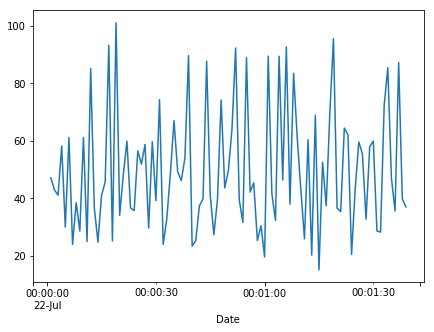

In [42]:
# The code will create the dataset for Temperature 1 Series.
tst1 = Series(df['Temp1'].values, index=df.Date) 
plt = tst1[1:100].plot(figsize=(7,5))
pyplot.show(plt)

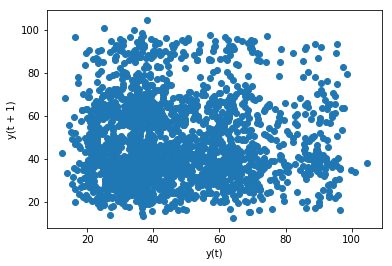

In [39]:
from pandas.plotting import lag_plot
lag_plot(tst1)
pyplot.show()

#### From the scatter plot I can see Temperature 1's data is spread across the diagonal line of the plot - witch again indicates a week correlation

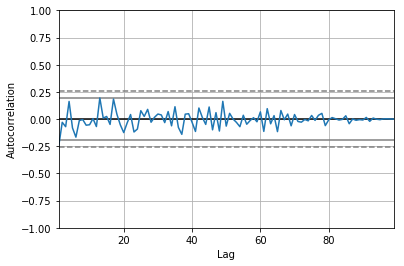

In [41]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(tst1[1:100])
pyplot.show()

#### Looking at Temperature 1 there is a very week correlation with a swing of only 0.25 to - 0.25

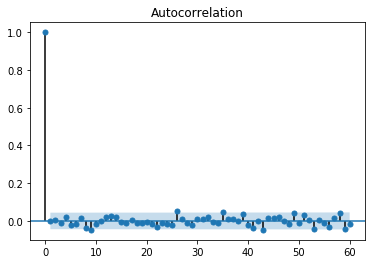

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tst1, lags=60)
pyplot.show()

Lag: 25
Coefficients: [  5.52448459e+01   2.23449576e-03  -1.27184661e-03  -1.37110952e-02
   2.38284626e-02  -2.21058245e-02  -1.36697268e-02   1.33099454e-02
  -3.30370467e-02  -4.48351345e-02  -1.67587497e-02  -5.38333508e-04
   2.68968361e-02   2.10936620e-02   2.44511578e-02  -3.94294422e-03
  -8.99362771e-03   8.41885866e-03  -1.20510373e-02  -9.33873038e-03
  -7.74145186e-03  -1.43078687e-02  -2.96654252e-02  -1.30514898e-02
  -1.94202971e-02  -2.11975112e-02]
predicted=43.572488, expected=36.631970
predicted=45.081649, expected=17.254900
predicted=50.409032, expected=78.207766
predicted=50.213273, expected=33.785923
predicted=51.869925, expected=28.099166
predicted=52.264579, expected=48.343542
predicted=48.321485, expected=21.566449
predicted=46.038349, expected=36.915755
predicted=46.779606, expected=26.057700
predicted=46.034037, expected=25.201797
predicted=45.455520, expected=64.241779
predicted=46.232537, expected=76.657513
predicted=46.065451, expected=62.973846
predicte

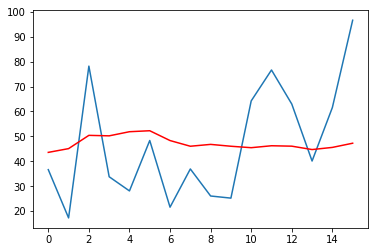

In [34]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset to get only the values
ts_values = tst1.values

train, test = ts_values[1:len(ts_values)-16], ts_values[len(ts_values)-16:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Running the AR model, I can see that lag: 25 was chosen and trained. The 16-hour forecast is printed above. The forecast sort of follows the actual values

### Temperature 2's info - Plotly grapf and Autocorelation Plots

In [48]:
trace4 = go.Scatter(
    y = df['Temp2'],
    mode='lines',
    name = 'Temp 2 actual',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace5 = go.Scatter(
    y = df['Temp2_ave'],
    mode='lines',
    name = 'Temp 2 average',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace6 = go.Scatter(
    y = df['Temp2_sd'],
    mode='lines',
    name = 'Temp 2 standard deviation',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)

data = [trace4, trace5, trace6]

layout = dict(
    title='Temperature 2 High and Low values',
    xaxis=dict(
        rangeselector=dict(),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Please use the sliding scale to narrow the search / use magnification on a area of interest (down sampling did not work out for this type of plot)

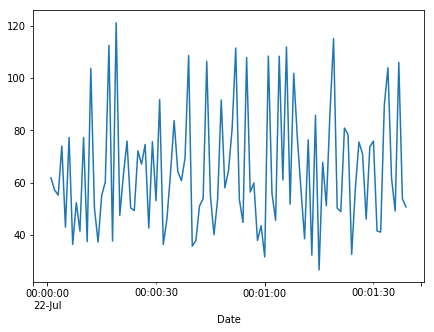

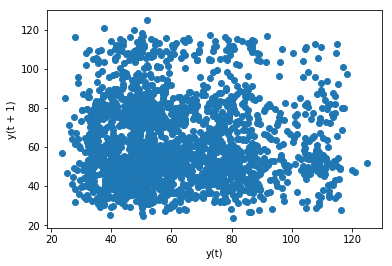

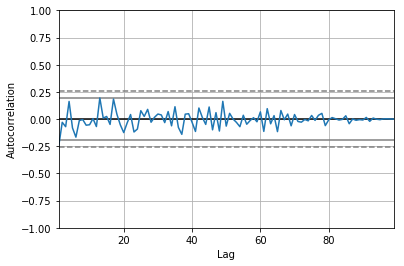

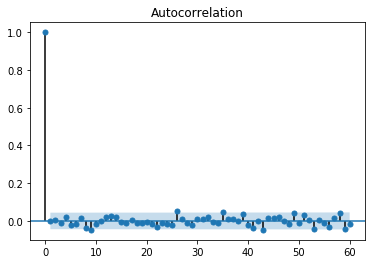

In [60]:
# The code will create the dataset for Temperature 2 Series.
tst2 = Series(df['Temp2'].values, index=df.Date) 
plt = tst2[1:100].plot(figsize=(7,5))
pyplot.show(plt)

lag_plot(tst2)
pyplot.show()

autocorrelation_plot(tst2[1:100])
pyplot.show()

plot_acf(tst2, lags=60)
pyplot.show()

#### This is a similar picture / indication (Temperature sensor 1) of a week correlation of Temperature sensor 2

Lag: 25
Coefficients: [  7.24233777e+01   2.23449576e-03  -1.27184661e-03  -1.37110952e-02
   2.38284626e-02  -2.21058245e-02  -1.36697268e-02   1.33099454e-02
  -3.30370467e-02  -4.48351345e-02  -1.67587497e-02  -5.38333508e-04
   2.68968361e-02   2.10936620e-02   2.44511578e-02  -3.94294422e-03
  -8.99362771e-03   8.41885866e-03  -1.20510373e-02  -9.33873038e-03
  -7.74145186e-03  -1.43078687e-02  -2.96654252e-02  -1.30514898e-02
  -1.94202971e-02  -2.11975112e-02]
predicted=57.929737, expected=50.295167
predicted=59.589814, expected=28.980390
predicted=65.449935, expected=96.028542
predicted=65.234601, expected=47.164515
predicted=67.056917, expected=40.909083
predicted=67.491037, expected=63.177896
predicted=63.153633, expected=33.723094
predicted=60.642184, expected=50.607330
predicted=61.457567, expected=38.663470
predicted=60.637441, expected=37.721976
predicted=60.001072, expected=80.665957
predicted=60.855790, expected=94.323264
predicted=60.671996, expected=79.271230
predicte

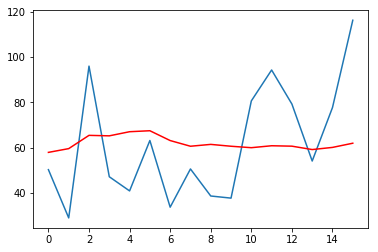

In [47]:
# split dataset to get only the values
ts_values = tst2.values

train, test = ts_values[1:len(ts_values)-16], ts_values[len(ts_values)-16:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Running the AR model, I can see that lag: 25 was chosen and trained. The 16-hour forecast is printed above. The forecast sort of follows the actual values

### Temperature 3's info

In [54]:
trace7 = go.Scatter(
    y = df['Temp3'],
    mode='lines',
    name = 'Temp 3 actual',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace8 = go.Scatter(
    y = df['Temp3_ave'],
    mode='lines',
    name = 'Temp 3 average',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace9 = go.Scatter(
    y = df['Temp3_sd'],
    mode='lines',
    name = 'Temp 3 standard deviation',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)

data = [trace7, trace8, trace9]

layout = dict(
    title='Temperature 3 High and Low values',
    xaxis=dict(
        rangeselector=dict(),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Please use the sliding scale to narrow the search / use magnification on a area of interest (down sampling did not work out for this type of plot)

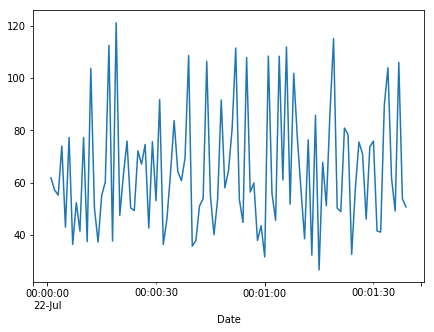

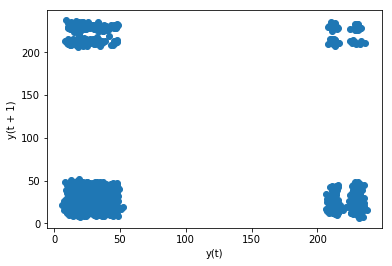

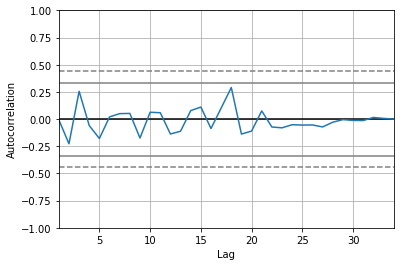

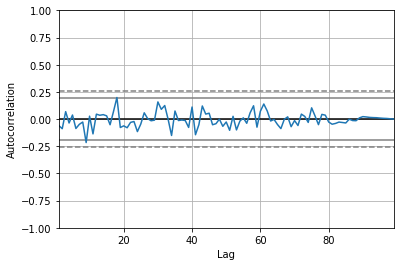

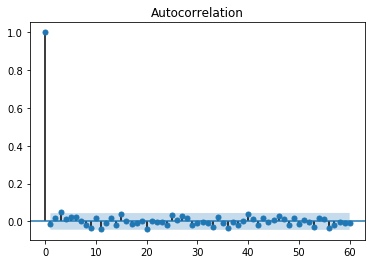

In [62]:
# The code will create the dataset for Temperature 3 Series.
tst3 = Series(df['Temp3'].values, index=df.Date) 
plt = tst2[1:100].plot(figsize=(7,5))
pyplot.show(plt)

lag_plot(tst3)
pyplot.show()

autocorrelation_plot(tst3[1:100])
pyplot.show()

plot_acf(tst3, lags=60)
pyplot.show()

#### This picture is slightly different but still a very week correlation. The data from Temperature sensor 3 is grouped in the corners across the diagonal line of the plot  

Lag: 25
Coefficients: [  5.59978137e+01  -1.04120543e-02   2.00623249e-02   4.62024193e-02
   1.73631752e-02   2.89807545e-02   1.95073802e-02   3.82435078e-03
  -2.55587717e-02  -3.74439006e-02   1.38307500e-02  -3.67027446e-02
  -6.31804168e-03   2.01473526e-02  -1.16677391e-02   4.49016735e-02
   3.68074183e-03  -9.88835703e-03  -1.42628190e-02  -4.71354738e-04
  -4.88825260e-02   5.74478786e-03  -8.82449307e-04   1.84671549e-04
  -1.30737253e-02   3.28170546e-02]
predicted=63.837555, expected=18.315985
predicted=54.176626, expected=8.627450
predicted=62.896705, expected=39.103883
predicted=68.673615, expected=16.892961
predicted=51.456087, expected=214.049583
predicted=72.322973, expected=24.171771
predicted=57.674683, expected=10.783225
predicted=53.076903, expected=18.457877
predicted=57.968395, expected=213.028850
predicted=57.481478, expected=12.600898
predicted=48.548418, expected=32.120889
predicted=61.918293, expected=38.328756
predicted=53.618871, expected=31.486923
predict

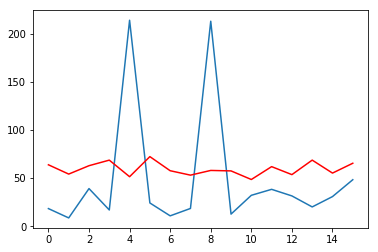

In [61]:
# split dataset to get only the values
ts_values = tst3.values

train, test = ts_values[1:len(ts_values)-16], ts_values[len(ts_values)-16:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Running the AR model, I can see that lag: 25 was chosen again and model was trained on this. The 16-hour forecast is printed above. The forecast deviates quite a bit from the actual values peaking at 4 and 8

### Ambient Temperature info - Plotly grapf and Autocorelation Plots

In [66]:
trace10 = go.Scatter(
    y = df['Temp_Ambient'],
    mode='lines',
    name = 'Ambient Temp actual',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace11 = go.Scatter(
    y = df['Temp_Am_ave'],
    mode='lines',
    name = 'Ambient Temp average',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)
trace12 = go.Scatter(
    y = df['Temp_Am_sd'],
    mode='lines',
    name = 'Ambient Temp standard deviation',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        showscale=True
    )
)

data = [trace10, trace11, trace12]

layout = dict(
    title='Temperature 3 High and Low values',
    xaxis=dict(
        rangeselector=dict(),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Please use the sliding scale to narrow the search / use magnification on a area of interest (down sampling did not work out for this type of plot)

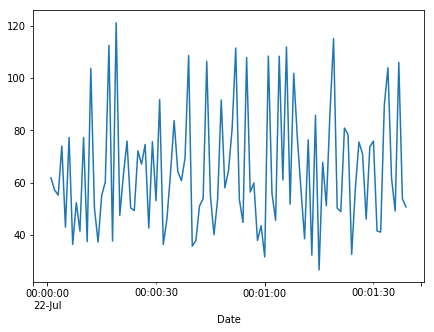

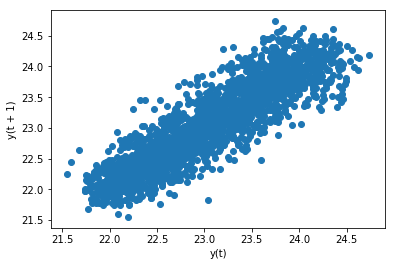

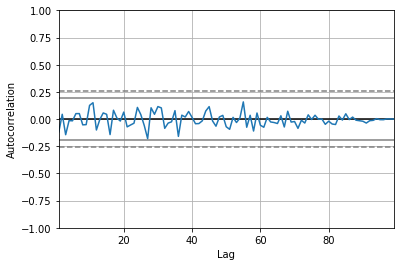

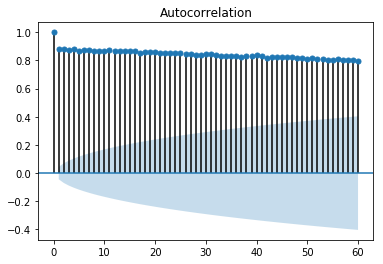

In [67]:
# The code will create the dataset for Temperature 3 Series.
tstA = Series(df['Temp_Ambient'].values, index=df.Date) 
plt = tst2[1:100].plot(figsize=(7,5))
pyplot.show(plt)

lag_plot(tstA)
pyplot.show()

autocorrelation_plot(tstA[1:100])
pyplot.show()

plot_acf(tstA, lags=60)
pyplot.show()

#### These pictures from the Ambient Temperature sensor indicate a high correlation but the correlation coefficient is still only between 0.25 and -0.25 which says this is a week correlation. The data spread across the diagonal line of the plot indicating a linear trend.

Lag: 25
Coefficients: [ 0.10670338  0.04401479  0.05021367  0.00963759  0.05193998 -0.01580651
  0.04833818  0.06457539 -0.00534046 -0.00145579  0.02052801  0.07627349
  0.03171924  0.03096298  0.03677596  0.08002705  0.10041067 -0.0189653
  0.0385952   0.04453086  0.08712103  0.0145506   0.02567537  0.03542656
  0.07829053  0.06807416]
predicted=24.230786, expected=24.110918
predicted=24.210119, expected=23.741410
predicted=24.255270, expected=24.153455
predicted=24.247411, expected=24.215799
predicted=24.251645, expected=23.768086
predicted=24.274848, expected=24.558904
predicted=24.265577, expected=24.271811
predicted=24.267449, expected=24.489534
predicted=24.291308, expected=23.817173
predicted=24.295784, expected=24.228087
predicted=24.293777, expected=24.248050
predicted=24.266753, expected=24.062023
predicted=24.282027, expected=24.171938
predicted=24.269308, expected=24.406753
predicted=24.321363, expected=24.254122
predicted=24.304326, expected=23.611311
Test MSE: 0.087


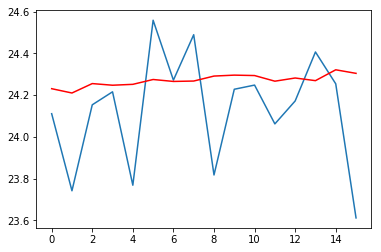

In [68]:
# split dataset to get only the values
ts_values = tstA.values

train, test = ts_values[1:len(ts_values)-16], ts_values[len(ts_values)-16:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Running the AR model, I can see that lag: 25 was chosen again and model was trained on this. The 16-hour forecast is printed above. The upward trend of the forecast is appropriate to the data.

## Final thoughts:

This was a very challenging Summative assessment but I learnt allot in terms of managing Time series data. This is a great park of my daily work and discussions I have with my customers. 

I did not manage to get data to SQL so I instead followed the advice of the moderators to create and use a csv file as my database. 

Spark failed me on many occasions (I have two lines of code that i used - the greyed out one keeps requesting a java file link)

Visualizing the data was great: Plotly took some time to get going and autocorrelation porting was informative to myself.
